In [63]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from ripser import ripser
import plotly.graph_objects as go
from src.clusterize_method import str_vector_to_list, perform_agglomerative_clustering_dendrogram
import os

home_path = os.getcwd()
initial_data_folder = 'initial data'
initial_data_path = os.path.join(home_path, initial_data_folder)
df = pd.read_excel(f'{initial_data_path}/terms_with_vectors.xlsx')
df = str_vector_to_list(df)
X = np.array(df["vector"].tolist())
distance_matrix = pairwise_distances(X)
result = ripser(distance_matrix)

diagrams = result['dgms']
fig = go.Figure()

for i, dgm in enumerate(diagrams):
    if len(dgm) > 0:
        x = [point[0] for point in dgm]
        y = [point[1] if np.isfinite(point[1]) else max(x) for point in dgm]
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name=f'Diagram {i}'))

fig.update_layout(title='Persistence Diagram')
fig.show()



100%|██████████| 85/85 [00:00<00:00, 21513.15it/s]
/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/ripser/ripser.py:247: UserWarning:

The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?



In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from ripser import ripser
from scipy.signal import find_peaks


df = pd.read_excel(f'{initial_data_path}/terms_with_vectors.xlsx')
df = str_vector_to_list(df)
X = np.array(df["vector"].tolist())
distance_matrix = pairwise_distances(X)
result = ripser(distance_matrix)
diagram = result['dgms'][1]
interval_lengths = np.array([point[1] - point[0] for point in diagram])
peaks, _ = find_peaks(interval_lengths, height=0.1)
num_clusters = len(peaks)

print(f"Рекомендованное количество кластеров: {num_clusters}")

100%|██████████| 85/85 [00:00<00:00, 22239.15it/s]

Рекомендованное количество кластеров: 7



/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/ripser/ripser.py:247: UserWarning:

The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?



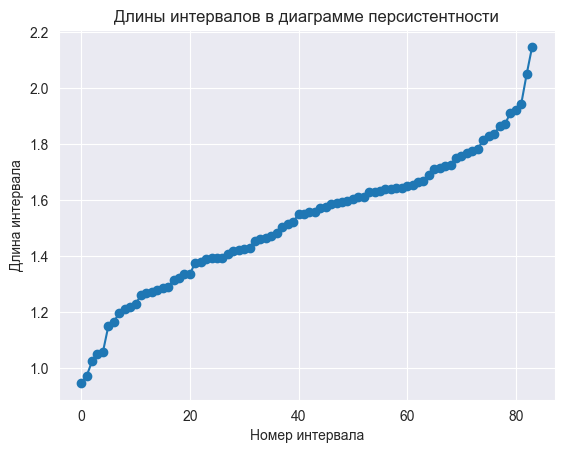

Рекомендованное количество кластеров: 0


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

diagram = result['dgms'][0]

interval_lengths = np.array([point[1] - point[0] for point in diagram])
interval_lengths = interval_lengths[~np.isinf(interval_lengths)]

plt.plot(interval_lengths, marker='o')
plt.xlabel('Номер интервала')
plt.ylabel('Длина интервала')
plt.title('Длины интервалов в диаграмме персистентности')
plt.show()
peaks_max, _ = find_peaks(interval_lengths, height=0.01)
peaks_min, _ = find_peaks(-interval_lengths, height=0.01)
significant_points = np.union1d(peaks_max, peaks_min)
significant_points.sort()

num_clusters = len(significant_points)
print(f"Рекомендованное количество кластеров: {num_clusters}")


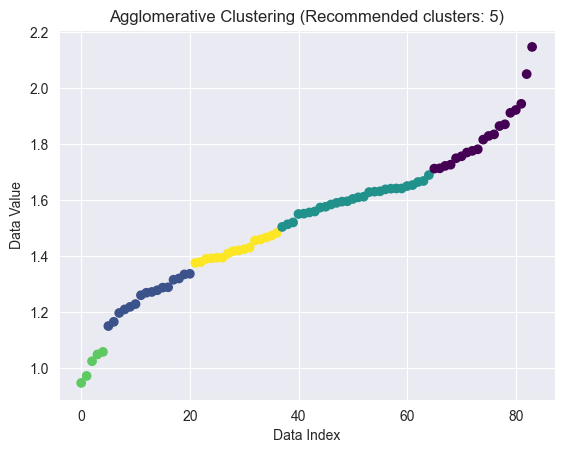

Рекомендованное количество кластеров: 5


In [67]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


def find_best_clusters(X, clustering_algorithm):
    silhouette_scores = []
    for n_clusters in range(2, len(X)):
        clustering = clustering_algorithm(n_clusters=n_clusters)
        labels = clustering.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    plateau_index = np.argmax(np.diff(silhouette_scores)) + 1
    best_num_clusters = plateau_index + 2
    return best_num_clusters

def plot_agglomerative_clustering(X, best_clusters):
    clustering = AgglomerativeClustering(n_clusters=best_clusters)
    labels = clustering.fit_predict(X)

    plt.scatter(range(len(X)), X, c=labels, cmap='viridis', marker='o')
    plt.xlabel('Data Index')
    plt.ylabel('Data Value')
    plt.title(f'Agglomerative Clustering (Recommended clusters: {best_clusters})')
    plt.show()

data = np.array(interval_lengths)
X = data.reshape(-1, 1)
best_agglomerative_clusters = find_best_clusters(X, AgglomerativeClustering)
plot_agglomerative_clustering(X, best_agglomerative_clusters)

print(f"Рекомендованное количество кластеров: {best_agglomerative_clusters}")

In [68]:
initial_data_path = os.path.join(home_path, initial_data_folder)
df = pd.read_excel(f'{initial_data_path}/terms_with_vectors.xlsx')
df = str_vector_to_list(df)


100%|██████████| 85/85 [00:00<00:00, 18897.27it/s]


/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



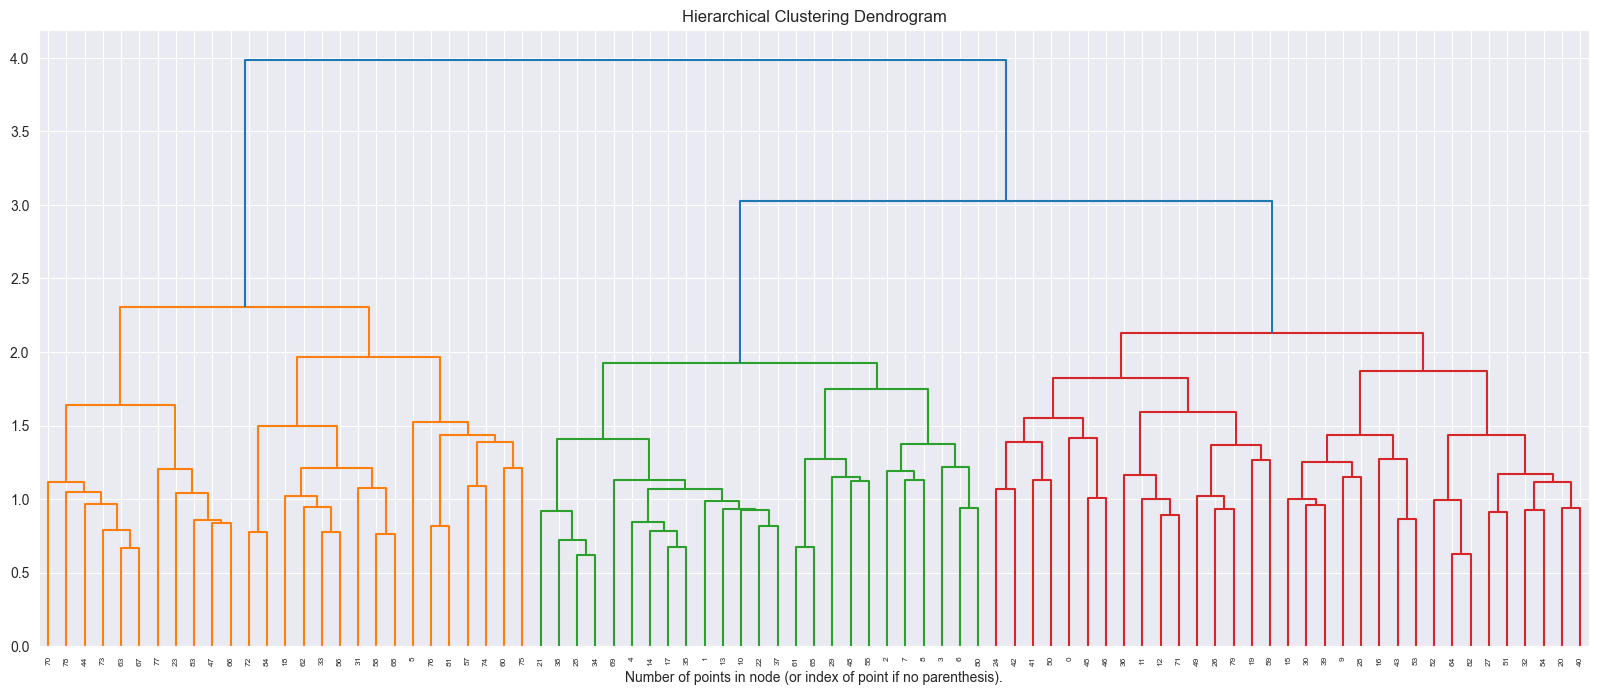

In [69]:
df = perform_agglomerative_clustering_dendrogram(df=df, distance_threshold=0)